In [9]:
import numpy as np
import matplotlib.pyplot as plt

# For creating data
from pyemittance.optics import quad_rmat_mat2, propagate_sigma

# Import pyemittance modules
# Handles I/O of data
from pyemittance.observer import Observer
# Handles optics and emittance/bmag calc
from pyemittance.emittance_calc import EmitCalc

# Create data

In [2]:
# Some beam covariance matrix
EMIT = 1e-9
BETA_X = 10
ALPHA_X = -1
GAMMA_X = (1+ALPHA_X**2)/BETA_X
SIGMA_X = np.sqrt(EMIT*BETA_X)
SIGMA_PX = np.sqrt(EMIT*GAMMA_X)
COV_X__PX = -ALPHA_X*EMIT


SIGMA_11 = SIGMA_X**2
SIGMA_12 = COV_X__PX
SIGMA_22 = SIGMA_PX**2

SIGMA0 = np.array([[SIGMA_11, SIGMA_12], [SIGMA_12, SIGMA_22]])

In [3]:
emit_calc = EmitCalc()

def beam_size_meas(kL, sigma0, Ltot=2.2, Lquad=0):
    mat2 = quad_rmat_mat2(kL, Lquad=Lquad)
    sigma1 = propagate_sigma(sigma0, mat2)
    return np.sqrt(sigma1[0,0])

def model(kL):
    return beam_size_meas(kL, SIGMA0, Ltot=2.26, Lquad=0.108)

kLlist = np.linspace(0.2, 0.7, 10)

# Make the data
meas =  np.array([model(k) for k in kLlist])

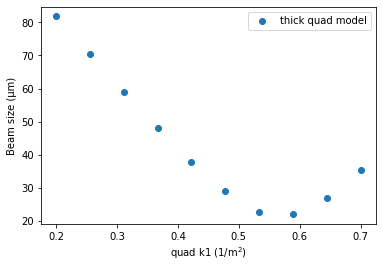

In [4]:
plt.scatter(kLlist, meas*1e6, label='thick quad model')
plt.xlabel(r'quad k1 (1/m$^2$)')
plt.ylabel('Beam size (µm)')
plt.legend()

# Fit data w/ PyEmittance: this can be used with any given dataset
Units needed: 
- kGauss for quadrupole strengths
- meters for beam sizes and beam sizes errors

- returns emittance in m*rad

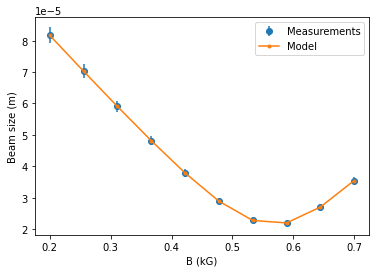

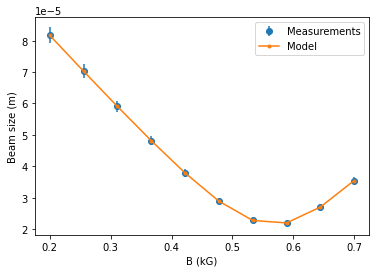

{'nemitx': 1.1729555941535996e-06,
 'nemity': 1.1729555941535996e-06,
 'nemitx_err': 2.402178217836499e-08,
 'nemity_err': 2.402178217836499e-08,
 'bmagx': None,
 'bmagy': None,
 'bmagx_err': None,
 'bmagy_err': None,
 'opt_q_x': None,
 'opt_q_y': None,
 'quadvalsx': array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
        0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ]),
 'beamsizesx': array([8.18211775e-05, 7.03250034e-05, 5.90474363e-05, 4.81246493e-05,
        3.78424872e-05, 2.88638586e-05, 2.27486140e-05, 2.19886922e-05,
        2.70084169e-05, 3.54073942e-05]),
 'quadvalsy': array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
        0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ]),
 'beamsizesy': array([8.18211775e-05, 7.03250034e-05, 5.90474363e-05, 4.81246493e-05,
        3.78424872e-05, 2.88638586e-05, 2.27486140e-05, 2.19886922e-05,
        2.70084169e-05, 3.54073942e-05])}

In [5]:
# Observer class handles all I/O
# avoids repeating measurements within an emittance calc
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.plot = True

ef.get_emit()

ef.out_dict

In [6]:
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.calc_bmag = True 


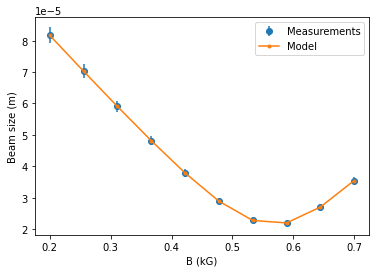

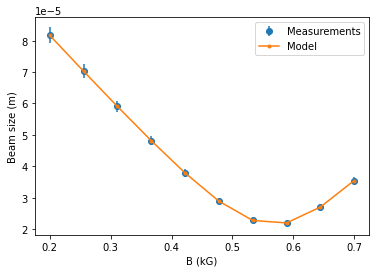

{'nemitx': 1.1729555941535996e-06,
 'nemity': 1.1729555941535996e-06,
 'nemitx_err': 2.402178217836499e-08,
 'nemity_err': 2.402178217836499e-08,
 'bmagx': 4.113374290008552,
 'bmagy': 4.115921432052214,
 'bmagx_err': 0.08424068370995265,
 'bmagy_err': 0.08429284842245782,
 'opt_q_x': 0.2,
 'opt_q_y': 0.2,
 'quadvalsx': array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
        0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ]),
 'beamsizesx': array([8.18211775e-05, 7.03250034e-05, 5.90474363e-05, 4.81246493e-05,
        3.78424872e-05, 2.88638586e-05, 2.27486140e-05, 2.19886922e-05,
        2.70084169e-05, 3.54073942e-05]),
 'quadvalsy': array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
        0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ]),
 'beamsizesy': array([8.18211775e-05, 7.03250034e-05, 5.90474363e-05, 4.81246493e-05,
        3.78424872e-05, 2.88638586e-05, 2.27486140e-05, 2.19886922e-05,
        2.70084169e-05, 3.540739

In [7]:
ef.plot = True
ef.get_emit()